# WEEK 02

### Make the plots pretty

Typically we will use color to explore data sets and label different values. There are a large number of color options in R. I like the **RSkittleBrewer** package, but you can also check out Jenny Bryan’s excellent lecture on colors in R for more information.

Load the library and set the color palette with the palette function. Now when I type `col = 1` it will look for the first color in the trop colors. We also set the character to be a filled dot with par`(pch=19)`.



In [6]:
library(RSkittleBrewer)
# Make the colors pretty
trop = RSkittleBrewer("tropical")
palette(trop)
par(pch=19)


## A: Dimension reduction for genomics

### Dependencies


In [2]:
library(devtools)
library(Biobase)

### Load some data

We will use this expression set that combines two studies [Transcriptome genetics using second generation sequencing in a Caucasian population.](https://www.nature.com/articles/nature08903) and [Understanding mechanisms underlying human gene expression variation with RNA sequencing.](https://www.nature.com/articles/nature08872). These studies are different populations but we counted the same genes for both. Then we’ll explore the differences.

In [3]:
# Downloading the data
con =url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/montpick_eset.RData")
load(file=con)
close(con)

# Create different datasets
mp = montpick.eset
pdata=pData(mp) # phenotype data
edata=as.data.frame(exprs(mp)) # Expression Data
fdata = fData(mp) # Feature Data
ls()

[1] "con"           "edata"         "fdata"         "montpick.eset"
[5] "mp"            "pdata"

### Calculate the singular vectors

In [4]:
# Here we calculate the singular vectors:
edata = edata[rowMeans(edata) > 100, ] # Removing low variance values
edata = log2(edata + 1) # Log2 coversion of the expression data
edata_centered = edata - rowMeans(edata) # make data centered
svd1 = svd(edata_centered)
names(svd1)

[1] "d" "u" "v"

### Look at the percent variance explained
The percent of variance explained is given by

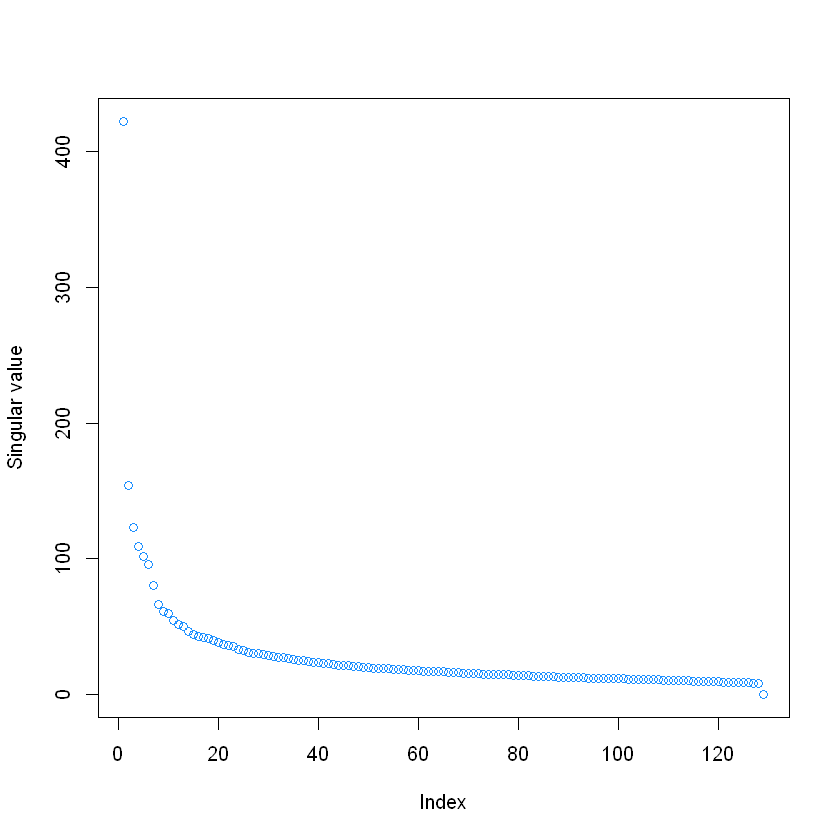

In [7]:
plot(svd1$d,ylab="Singular value",col=2)

### Plot top two principal components

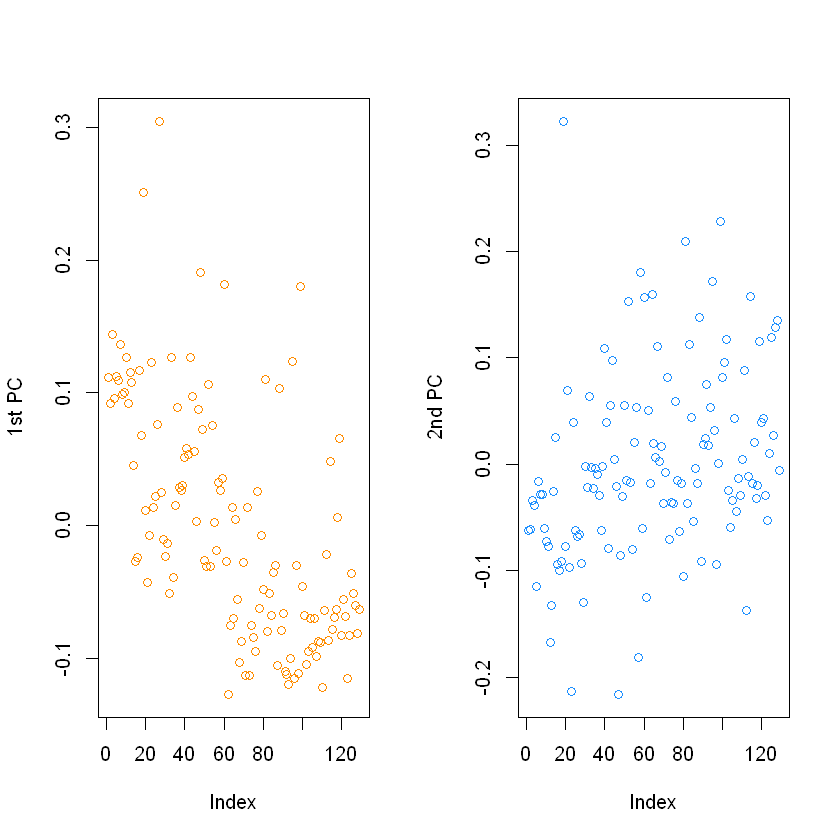

In [9]:
par(mfrow=c(1,2))
plot(svd1$v[,1],col=1,ylab="1st PC")
plot(svd1$v[,2],col=2,ylab="2nd PC")

### Plot PC1 vs. PC2

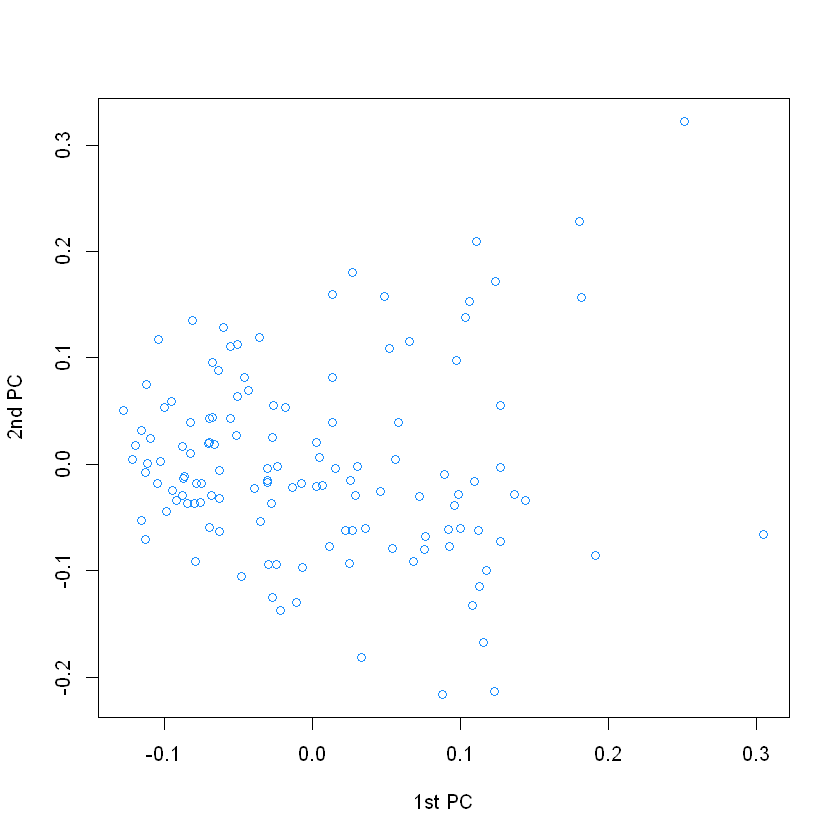

In [10]:
# A very common plot is to plot PC1 versus PC2 to see if you can see any “clusters” or “groups”.
plot(svd1$v[,1],svd1$v[,2],col=2,ylab="2nd PC",xlab="1st PC")

One thing you can do is color them by `different variables` to see if `clusters` stand out.

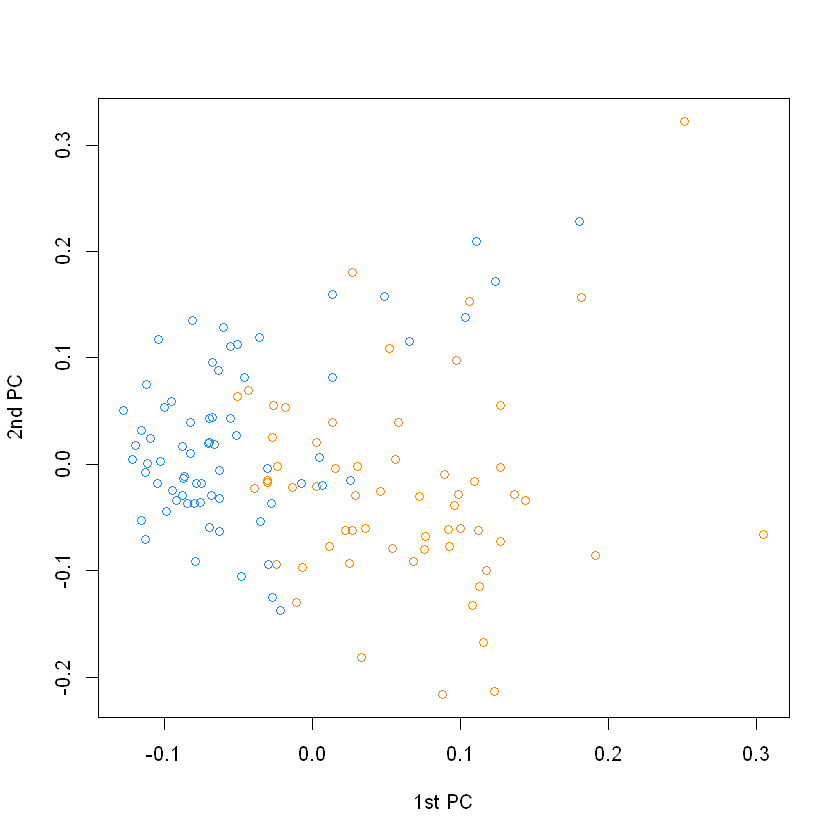

In [11]:
plot(svd1$v[,1],svd1$v[,2],ylab="2nd PC",
     xlab="1st PC",col=as.numeric(pdata$study))

Another common plot is to make boxplots comparing the PC for different levels of known `covariates` (don’t forget to show the actual data!)

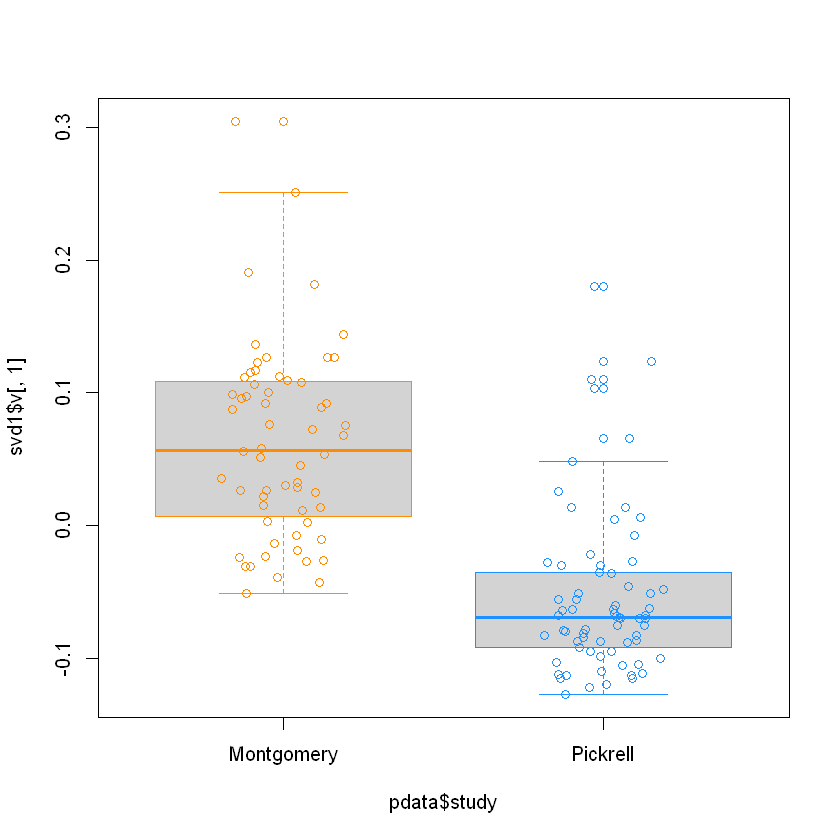

In [12]:
boxplot(svd1$v[,1] ~ pdata$study,border=c(1,2))
points(svd1$v[,1] ~ jitter(as.numeric(pdata$study)),col=as.numeric(pdata$study))

### PCs versus SVs


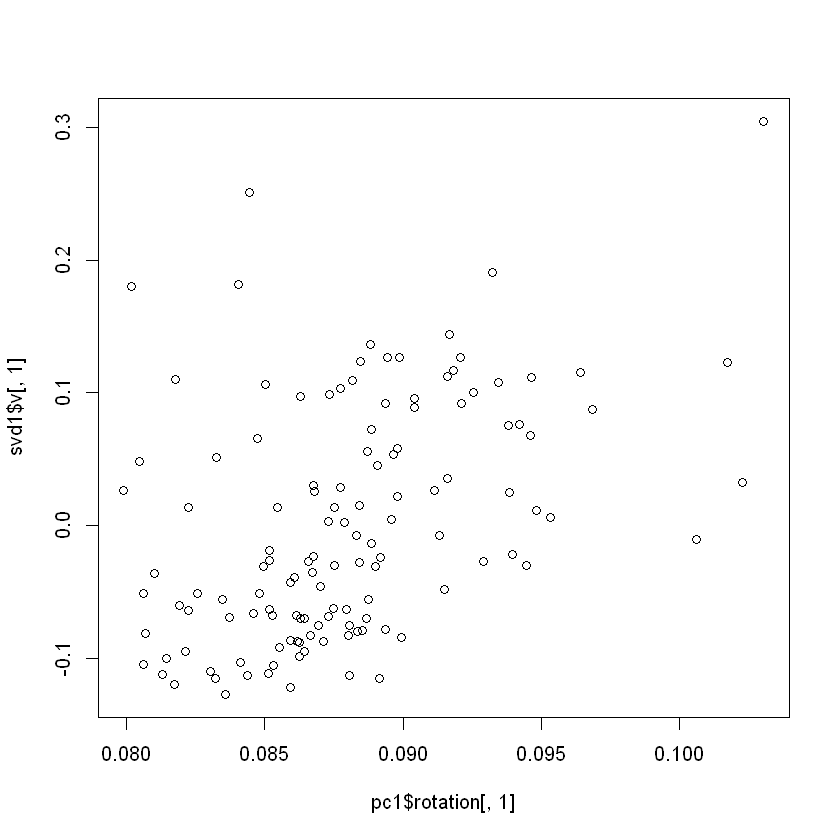

In [14]:
## What we have been plotting is not exactly the principal components.
pc1 = prcomp(edata)
plot(pc1$rotation[,1],svd1$v[,1])

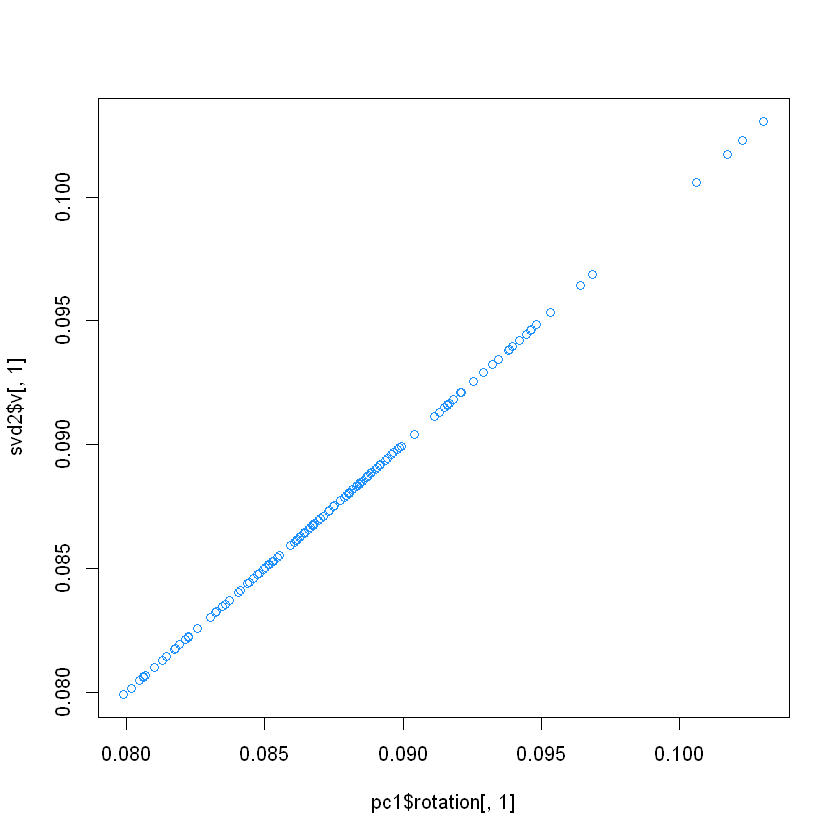

In [15]:
## To get the actual PCs you have to subtract the column means rather than the row means when normalizing.
edata_centered2 = t(t(edata) - colMeans(edata))
svd2 = svd(edata_centered2)
plot(pc1$rotation[,1],svd2$v[,1],col=2)

Despite this, it is most common for people to perform row-centering and then plot the singular vectors (sometimes labeling them PCs like I have done in this document)


### Outliers
What happens if we introduce a single outlying gene

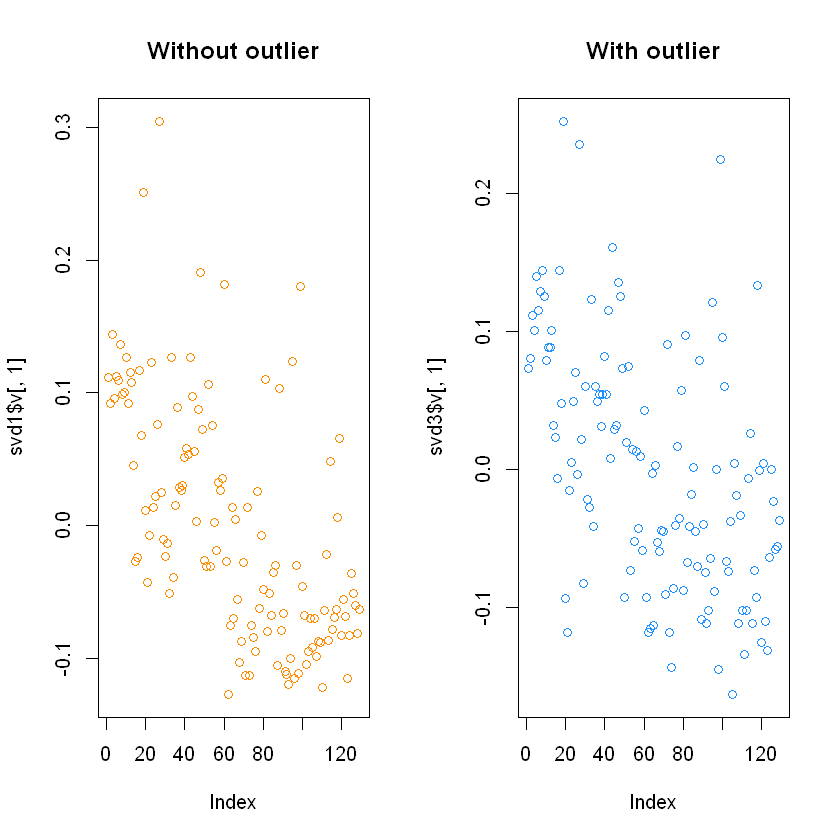

In [16]:
edata_outlier = edata_centered
edata_outlier[1,] = edata_centered[1,] * 10000
svd3 = svd(edata_outlier)
par(mfrow=c(1,2))
plot(svd1$v[,1],col=1,main="Without outlier")
plot(svd3$v[,1],col=2,main="With outlier")

It turns out the new top singular vector is perfectly correlated with the outlying gene

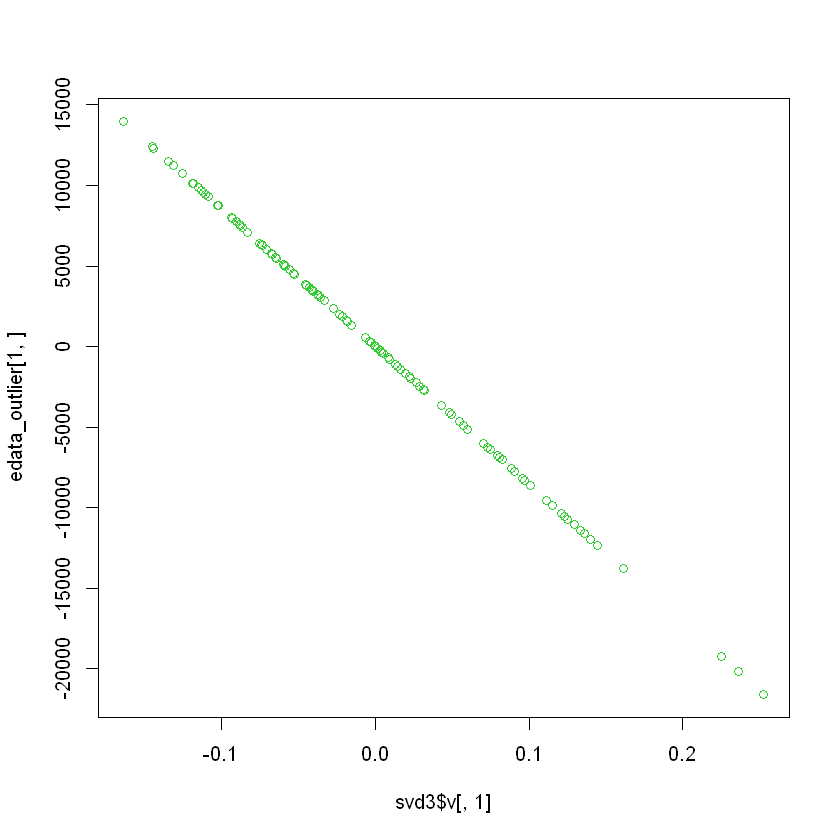

In [17]:
plot(svd3$v[,1],edata_outlier[1,],col=4)

### Session information

In [18]:
devtools::session_info()

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
base64enc,base64enc,0.1.3,0.1-3,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/base64enc,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/base64enc,FALSE,FALSE,2015-07-28,CRAN (R 4.1.1),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
Biobase,Biobase,2.54.0,2.54.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/Biobase,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/Biobase,TRUE,FALSE,2021-10-26,Bioconductor,TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
BiocGenerics,BiocGenerics,0.40.0,0.40.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/BiocGenerics,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/BiocGenerics,TRUE,FALSE,2021-10-26,Bioconductor,TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
brio,brio,1.1.3,1.1.3,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/brio,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/brio,FALSE,FALSE,2021-11-30,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
cachem,cachem,1.0.6,1.0.6,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/cachem,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/cachem,FALSE,FALSE,2021-08-19,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
callr,callr,3.7.0,3.7.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/callr,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/callr,FALSE,FALSE,2021-04-20,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
cli,cli,3.1.1,3.1.1,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/cli,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/cli,FALSE,FALSE,2022-01-20,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
crayon,crayon,1.5.0,1.5.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/crayon,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/crayon,FALSE,FALSE,2022-02-14,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
desc,desc,1.4.0,1.4.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/desc,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/desc,FALSE,FALSE,2021-09-28,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1


## Important
There are a large number of resources available about PCA and SVD but the lecture notes from [Advanced Statistics](http://genomicsclass.github.io/book/) for the Life Sciences are the best set of lecture notes focused on genomics currently available.
